# Explore here

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Selecting only the required columns: Latitude, Longitude, and MedInc
selected_columns = ['Latitude', 'Longitude', 'MedInc']
data = data[selected_columns]

# Splitting the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)


Train set shape: (16512, 3)
Test set shape: (4128, 3)


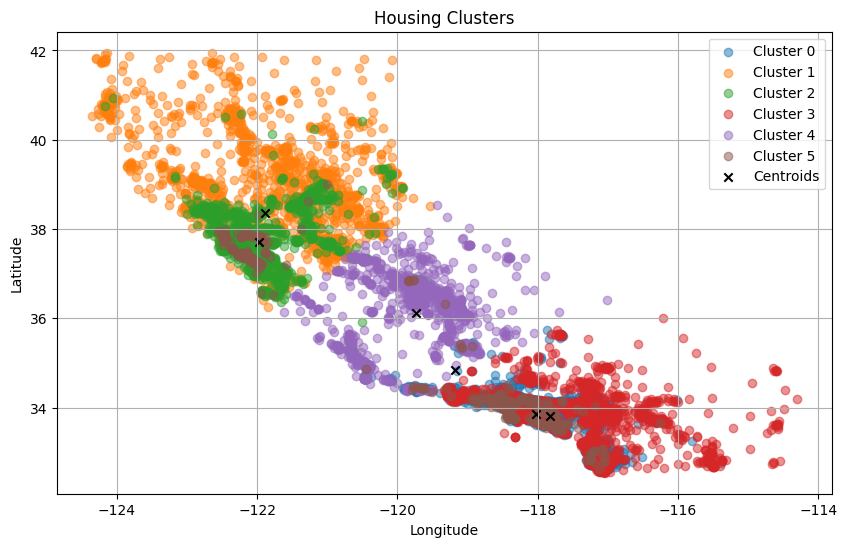

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Build the K-Means model
kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(6):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='x', color='black', label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Clusters')
plt.legend()
plt.grid(True)
plt.show()

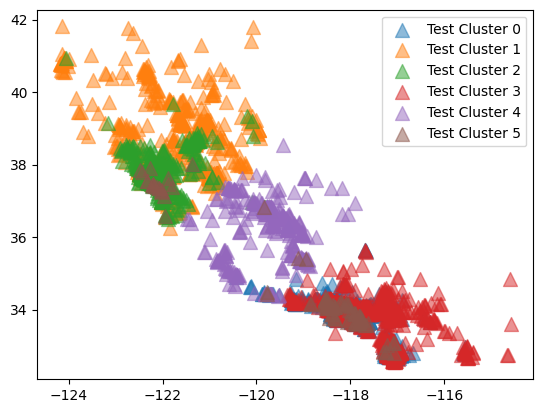

In [5]:
# Predict with the test set
test_data['cluster'] = kmeans.predict(test_data)

# Add the test set points to the existing plot
for cluster in range(6):
    cluster_data = test_data[test_data['cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Test Cluster {cluster}', alpha=0.5, marker='^', s=100)

plt.legend()
plt.show()


In [6]:
# Fit the K-Means model to the training data
kmeans.fit(train_data)

# Get the inertia of the trained K-Means model
inertia = kmeans.inertia_

print("Inertia of the K-Means model:", inertia)


Inertia of the K-Means model: 33935.14728305378


In [7]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the training data
silhouette_avg = silhouette_score(train_data, kmeans.labels_)

print("Silhouette score for the K-Means model:", silhouette_avg)


Silhouette score for the K-Means model: 0.3410613048058064


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features for training
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]

# Target variable for training
y_train = train_data['MedInc']

# Features for testing
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]

# Target variable for testing
y_test = test_data['MedInc']

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)





Mean Squared Error: 2.483552915407359e-05


In [15]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.9999929828114593
